# Анализ новостных сообщений

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/news_lenta_subsample.csv', usecols = ['title', 'text', 'topic', 'tags'])

In [4]:
df.tail()

,tags,text,title,topic
64284,Все,Сегодня днем из-за неисправности тормозной сис...,Авария на Ярославском вокзале,Россия
64285,Все,"Агентство ИТАР-ТАСС передало сегодня, что подх...",CША не будут блокировать выделение России кред...,Россия
64286,Все,"Со среды в Чечне отключен ретранслятор, и тепе...",В Чечне отключили ОРТ и РТР,Россия
64287,Все,Одинсотрудник абхазской таможни сегодня утром ...,Убит абхазский таможенник,Мир
64288,Все,Британцы отмечают сегодня скорбную дату - втор...,Британцы отмечают двухлетие смерти Дианы,Мир


In [5]:
df['topic'].value_counts()

Россия               14653
Мир                  12733
Экономика             7106
Спорт                 5356
Культура              4993
Наука и техника       4894
Бывший СССР           4740
Интернет и СМИ        4203
Из жизни              2453
Силовые структуры      980
Бизнес                 709
Ценности               669
Путешествия            607
69-я параллель         103
Крым                    56
Культпросвет            34
Name: topic, dtype: int64

In [6]:
df['tags'].value_counts()

Все                  41721
Политика              2950
Общество              2541
Украина               1585
Происшествия          1401
Госэкономика          1129
Футбол                1117
Кино                   842
Бизнес                 786
Интернет               729
Наука                  616
Следствие и суд        574
Музыка                 540
Преступность           452
Люди                   438
События                319
Космос                 314
Конфликты              281
Coцсети                279
ТВ и радио             274
Летние виды            267
Криминал               242
Гаджеты                220
Регионы                217
Явления                207
Деловой климат         204
Бокс и ММА             197
Мир                    196
Звери                  194
Игры                   182
                     ...  
Часы                    67
Внешний вид             66
Мнения                  60
Казахстан               58
Софт                    58
Россия                  58
М

In [7]:
sample = df[df['tags'] == 'Кино']
print(len(sample))

842


### Предобработка

#### Оставляем только слова:

In [9]:
import re
regex = re.compile("[А-Яа-я]+")

In [10]:
def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


sample.text = sample.text.str.lower()
sample.text = sample.text.apply(words_only)

In [11]:
sample.text.iloc[0]

'российский актер и режиссер константин хабенский попал в базу данных украинского сайта миротворец за посещение крыма сознательное нарушение государственной границы украины с целью проникновения в захваченный российскими оккупантами крым участие в пропагандистских мероприятиях россии страна агрессор говорится на сайте в июле года хабенский посетил полуостров где принял участие в фестивале алые паруса в лагере артек в базе миротворца значатся сотни известных россиян авторы ресурса публикуют личные данные людей оппозиционно настроенных по отношению к киевским властям там также размещают информацию о российских артистах побывавших на полуострове после его присоединения к россии крым и севастополь вошли в состав россии в марте года по итогам референдума в ходе которого подавляющее большинство жителей высказались за присоединение к россии киев и страны запада отказались признать результаты плебисцита в москве отмечают что процедура присоединения региона соответствовала нормам международного

#### Убираем стоп-слова:

In [12]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

print(mystopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [15]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
sample.text = sample.text.apply(remove_stopwords)   

In [23]:
sample.text.iloc[0][:100]

'российский актер режиссер константин хабенский попадать база данные украинский сайт миротворец посещ'

#### Лемматизируем

In [17]:
from pymystem3 import Mystem

In [18]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [19]:
%%time 
sample.text = sample.text.apply(lemmatize)

CPU times: user 703 ms, sys: 45.9 ms, total: 748 ms
Wall time: 6.14 s


In [22]:
sample.text.iloc[0][:100]

'российский актер режиссер константин хабенский попадать база данные украинский сайт миротворец посещ'

#### Удаление стоп-лемм

In [24]:
mystoplemmas = ['который', 'прошлый', 'сей', 'свой', 'наш', 'мочь', 'год']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

sample.text = sample.text.apply(remove_stoplemmas)   

### Частотный словарь и облако слов

In [34]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [28]:
lemmata = [lemma for text in sample.text for lemma in text.split()]

In [29]:
cnt = Counter(lemmata)

In [30]:
for i in cnt.most_common(10):
    print(i)

('фильм', 1827)
('картина', 814)
('актер', 777)
('роль', 713)
('режиссер', 682)
('лента', 577)
('становиться', 521)
('сериал', 507)
('выходить', 485)
('сообщать', 485)


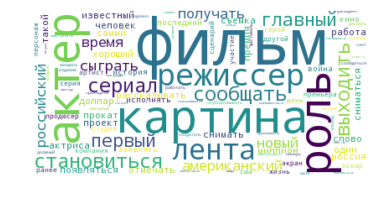

In [32]:
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* по частотам VS посложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные методы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* Синтаксические шаблоны


### Морфологические шаблоны

Можно использовать парсер  Yargy. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

### Использование мер связности 


$w_1, w_2$ − два слова

$f(w_1), f(w_2)$ − их частоты

$f(w_1, w_2)$ − совместная частота биграммы $w_1 w_2$

$N$ − число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$

![chi-square](chi-square-formula.jpg)

### На практике

Получаем из датафрейма списки по разных топиков:

In [52]:
def get_topic_to_tokens(df):
    tokens_by_topic = {}
    for topic in set(df['topic']):
        
        # берём только относительно большие темы
        if df['topic'].value_counts()[topic] > 100:
            
            # берём по сто случайных текстов из каждой темы
            sample = df[df['topic']==topic].sample(n=100)
            
            # предобрабатываем
            sample.text = sample.text.str.lower()
            sample.text = sample.text.apply(words_only)
            sample.text = sample.text.apply(remove_stopwords) 
            sample.text = sample.text.apply(lemmatize)
            sample.text = sample.text.apply(remove_stoplemmas) 

            tokens_by_topic[topic] = [tok for text in sample.text for tok in text.split()]
            
    return tokens_by_topic

In [53]:
tokens_by_topic = get_topic_to_tokens(df)

In [54]:
tokens_by_topic.keys()

dict_keys(['Ценности', 'Экономика', 'Бизнес', 'Мир', 'Россия', '69-я параллель', 'Силовые структуры', 'Путешествия', 'Бывший СССР', 'Спорт', 'Культура', 'Интернет и СМИ', 'Наука и техника', 'Из жизни'])

Выберем тему, из текстов про которую будем извлекать ключевые слова:

In [55]:
topic_texts = tokens_by_topic['Путешествия']

In [57]:
topic_texts[:10]

['германия',
 'январь',
 'декабрь',
 'принимать',
 'тысяча',
 'заявка',
 'шенгенский',
 'виза',
 'россиянин',
 'корреспондент']

Извлекаем биграммы по разным мерам связности:

In [43]:
import nltk
from nltk.collocations import *

In [58]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(topic_texts) # класс для хранения и извлечения биграм

In [59]:
N_best = 100 # число извлекаемых биграм

In [8]:
%%time 
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз

# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

NameError: name 'finder' is not defined

Результаты:

In [63]:
rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,лента ру,де жанейро,лента ру,биг мак,лента ру
1,тысяча рубль,коралловый риф,тысяча рубль,голубой флаг,тысяча рубль
2,санкт петербург,саудовский аравия,санкт петербург,де жанейро,санкт петербург
3,российский турист,рио де,становиться известно,консульский отдел,пресс релиз
4,самый популярный,голубой флаг,самый популярный,коралловый риф,становиться известно
5,становиться известно,консульский отдел,российский турист,саудовский аравия,редакция лента
6,второй место,биг мак,пресс релиз,шарм эль,самый популярный
7,пресс релиз,гнев протест,второй место,эль шейх,поступать редакция
8,российский путешественник,майя ломидзе,российский путешественник,лента ру,нью йорк
9,редакция лента,минеральный вода,редакция лента,санкт петербург,корреспондент лента


Похожи ли списки биграм? Давайте посчитаем корреляцию и визуализируем.

In [62]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline

In [64]:
corr = spearmanr(rankings).correlation

In [65]:
corr

array([[ 1.        , -0.01772577,  0.3769577 , -0.05124512,  0.04475248],
       [-0.01772577,  1.        ,  0.0190099 , -0.10882688,  0.02354635],
       [ 0.3769577 ,  0.0190099 ,  1.        , -0.1029703 , -0.09238524],
       [-0.05124512, -0.10882688, -0.1029703 ,  1.        ,  0.10880288],
       [ 0.04475248,  0.02354635, -0.09238524,  0.10880288,  1.        ]])

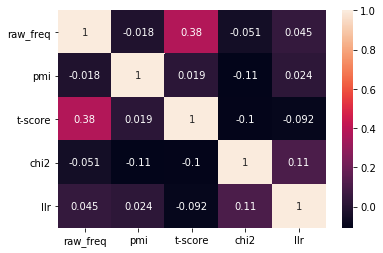

In [66]:
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

Если у нас есть данные про время, можно считать "трендовые слова": те слова, ранг которых по частотности вырос по сравнению с предыдущим периодом.

#### Задание

Возьмите две главны какой-нибудь большой книжки (или другие текстовые данные, в которых что-то известно про время создания), и найдите трендовые слова используя разницу в порядке слова по частотности.

### Графовые методы

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми. 
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

Меры центральностей.
![centralities](centrality_measures.png)

A) Betweenness centrality

B) Closeness centrality

C) Eigenvector centrality

D) Degree centrality

E) Harmonic centrality

F) Katz centrality of the same graph.

#### TextRank

Работает по тому же принципу, что и PageRank. Рёбра -- совстречаемость слов.

![PageRank](PageRank.jpg)

Используем TextRank для извлечения ключевых слов:

In [67]:
from gensim.summarization import keywords

In [69]:
%%time
text = ' '.join(topic_texts)
kw = keywords(text)

CPU times: user 31.3 s, sys: 4.04 s, total: 35.3 s
Wall time: 33.2 s


Результаты:

In [70]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

,Text Rank
0,россия
1,россиискии
2,процент
3,самыи
4,реис
5,отмечать
6,человек
7,регион турист
8,мост страна
9,отель


## Мера контрастности $tf-idf$



Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.

Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается. 

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [86]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for topic, tokens in tokens_by_topic.items()])
feature_names = tfidf.get_feature_names() 
dense = tfidf_matrix.todense()

In [87]:
topic_id = 5

In [88]:
text = dense[topic_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)

In [91]:
tfidf_ranking = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

Результаты:

In [90]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

,tf-idf
0,мурманский
1,арктика
2,норникель
3,мурманский область
4,сообщать
5,арктический
6,ненецкий
7,красноярский
8,янао
9,россия
